<a href="https://colab.research.google.com/github/JHBaek0306/ImageProcess/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


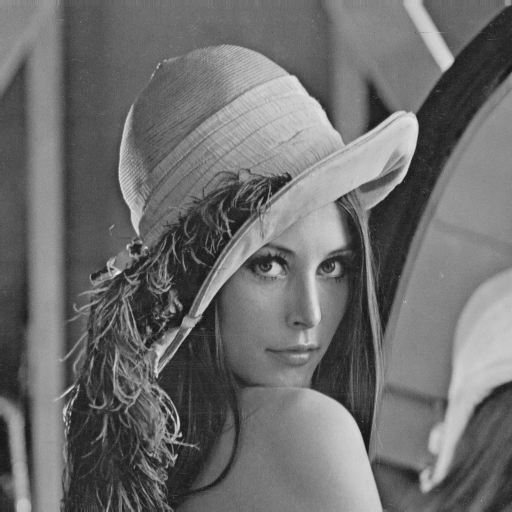

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
images = '/content/drive/MyDrive/Developement/Image/lena_grey.bmp'

img = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Histogram


Text(0.5, 1.0, 'OpenCV')

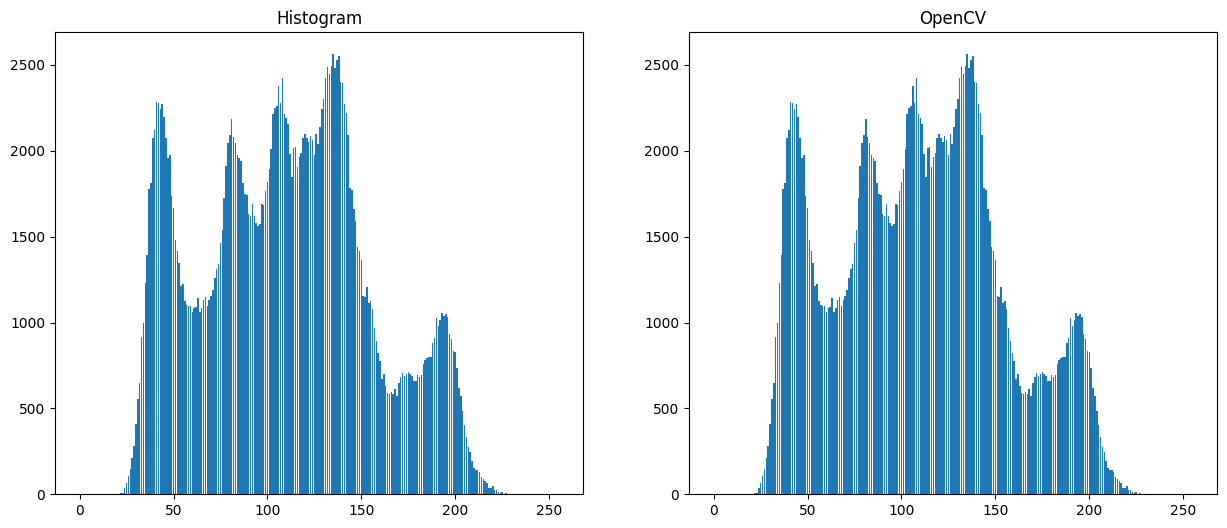

In [3]:
# initialize histogram array filled with 0
histo = np.zeros(shape=(256,), dtype=np.int64)

# get image's height and weight
h, w = img.shape

# Increase the corresponding histogram column by 1
for i in range(h):
    for j in range (w):
        histo[img[j, i]] = histo[img[j, i]] + 1


plt.figure(figsize=(15,6))
# Plot in bar
plt.subplot(1,2,1)
bins = np.arange(0, 256, 1)
plt.bar(bins, histo)
plt.title("Histogram")

# With Open CV
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(1,2,2)
plt.bar(bins, hist.ravel())
plt.title("OpenCV")

# Histogram Equalization

Text(0.5, 1.0, 'OpenCV')

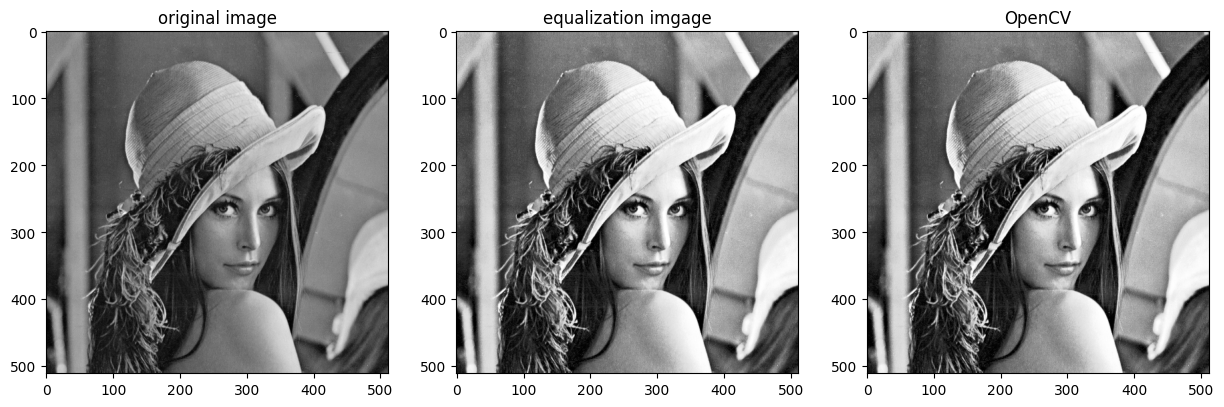

In [4]:
# Probability Density Function
quantization_hist = np.zeros(shape=(256,), dtype=np.float64)
for i in range(256):
    quantization_hist[i] = histo[i] / (h * w)

# Cumulative Distribution Function
cumulative = np.zeros((256,), dtype=np.float64)
for i in range(1, 256):
    cumulative[i] = cumulative[i - 1] + quantization_hist[i]

# Equalization Histogram Function
equalization_hist = np.zeros((256,), dtype=np.float64)
equalization_hist = np.round(cumulative * 255)

equalization_img = np.zeros(shape=(h, w), dtype=np.int64)
for i in range(h):
    for j in range(w):
        equalization_img[i, j] = equalization_hist[img[i, j]]

# Using OpenCV
cv2_equalization_img = cv2.equalizeHist(img)

# Print image
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("original image")

plt.subplot(1,3,2)
plt.imshow(equalization_img, cmap="gray")
plt.title("equalization imgage")

plt.subplot(1,3,3)
plt.imshow(cv2_equalization_img, cmap="gray")
plt.title("OpenCV")

# Two Dimension Histogram

Text(0.5, 1.0, 'target_image')

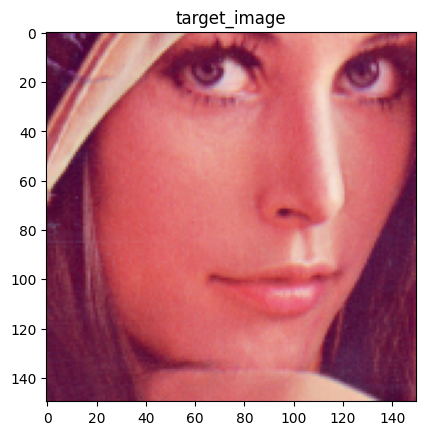

In [14]:
color_img = cv2.imread("/content/drive/MyDrive/Developement/Image/lena.bmp")
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

target_image = np.copy(color_img[250:400, 200:350])
plt.imshow(target_image)
plt.title("target_image")

In [6]:
# Quantization Funciton
def quantize(a, q, L):
    result = int(np.trunc((a * q) / L))
    return result

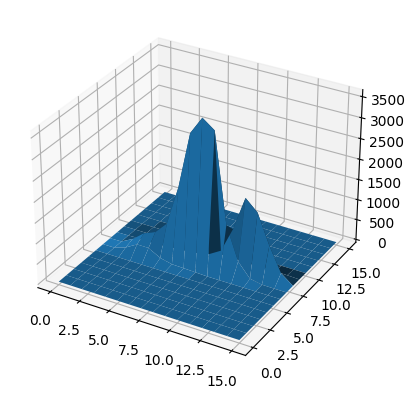

In [17]:
hsv_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
hsv_face_img = cv2.cvtColor(target_image, cv2.COLOR_BGR2HSV)

# Quantization Mapping
q = 16
L = 256

M, N, V = hsv_face_img.shape
hs_hist = np.zeros(shape=(q, q))

# Quantization
for j in range(M):
    for i in range(N):
        hs_hist[quantize(hsv_face_img[j,i,0],q, L), quantize(hsv_face_img[j,i,1], q, L)] += 1

# Normalize Histogram
n_hs_hist = np.zeros(shape=(q,q))
for j in range(q):
    for i in range(q):
        n_hs_hist[j,i] = hs_hist[j,i] / (M * N)

x = np.arange(q)
y = np.arange(q)
xx,yy = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx,yy,hs_hist.squeeze())

plt.show()

In [39]:
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


# Back Projection

<ipython-input-53-646392cd5083>:17: RuntimeWarning: invalid value encountered in divide
  R = M / I


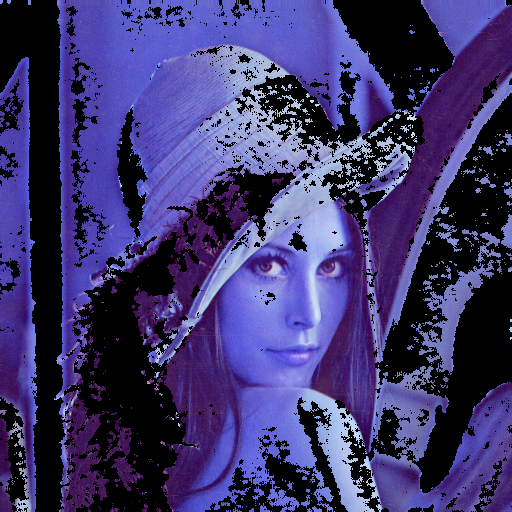

-1

In [53]:
hsvt = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(target_image, cv2.COLOR_BGR2HSV)
h, w, d = hsv.shape
th, tw, td = hsvt.shape

M = np.zeros(shape=(180, 256))
I = np.zeros(shape=(180, 256))

for i in range(h):
    for j in range(w):
        M[hsv[i,j,0], hsv[i,j,1]] += 1

for i in range(th):
    for j in range(tw):
        I[hsvt[i,j,0], hsvt[i,j,1]] += 1

R = M / I

h,s,v = cv2.split(hsvt)

B = R[h.ravel(), s.ravel()]

B = np.minimum(B, 1)
B = B.reshape(hsvt.shape[:2])

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)

ret,thresh = cv2.threshold(B,10,255,0)

thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(color_img,thresh)

cv2_imshow(res)
cv2.waitKey(0)